In [1]:
!pip install mlflow scikit-learn pandas numpy matplotlib seaborn

  Using cached mlflow-3.6.0-py3-none-any.whl.metadata (31 kB)
  Using cached mlflow_skinny-3.6.0-py3-none-any.whl.metadata (31 kB)
  Using cached mlflow_tracing-3.6.0-py3-none-any.whl.metadata (19 kB)
  Using cached flask_cors-6.0.1-py3-none-any.whl.metadata (5.3 kB)
  Using cached flask-3.1.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached cryptography-46.0.3-cp311-abi3-manylinux_2_34_x86_64.whl.metadata (5.7 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached gunicorn-23.0.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached huey-2.5.4-py3-none-any.whl.metadata (4.6 kB)
  Using cached cachetools-6.2.1-py3-none-any.whl.metadata (5.5 kB)
  Using cached databricks_sdk-0.73.0-py3-none-any.whl.metadata (40 kB)
  Using cached fastapi-0.121.0-py3-none-any.whl.metadata (28 kB)
  Using cached opentelemetry_api-1.38.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached opentelemetry_proto-1.38.0-p

In [2]:
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

mlflow.set_tracking_uri("https://mlflow.labs.itmo.loc")

experiment_name = "wine-classification-lab"
try:
    experiment_id = mlflow.create_experiment(experiment_name)
except:
    experiment = mlflow.get_experiment_by_name(experiment_name)
    experiment_id = experiment.experiment_id

mlflow.set_experiment(experiment_name)

print(f"MLflow Tracking URI: {mlflow.get_tracking_uri()}")
print(f"Experiment ID: {experiment_id}")


MLflow Tracking URI: https://mlflow.labs.itmo.loc
Experiment ID: 4


In [3]:
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
feature_names = wine_data.feature_names
target_names = wine_data.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].map({i: name for i, name in enumerate(target_names)})

print("="*70)
print("WINE DATASET - ИНФОРМАЦИЯ О ДАТАСЕТЕ")
print("="*70)
print(f"\nРазмер датасета: {X.shape[0]} образцов, {X.shape[1]} признаков")
print(f"Классы (сорта вина): {target_names}")
print(f"Распределение классов:\n{df['target_name'].value_counts()}")
print(f"\nПризнаки (химические свойства):")
for i, feature in enumerate(feature_names, 1):
    print(f"  {i}. {feature}")

print(f"\nБазовая статистика:")
print(df.describe()[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']].round(2))

print(f"\nПропущенные значения: {df.isnull().sum().sum()}")


WINE DATASET - ИНФОРМАЦИЯ О ДАТАСЕТЕ

Размер датасета: 178 образцов, 13 признаков
Классы (сорта вина): ['class_0' 'class_1' 'class_2']
Распределение классов:
target_name
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

Признаки (химические свойства):
  1. alcohol
  2. malic_acid
  3. ash
  4. alcalinity_of_ash
  5. magnesium
  6. total_phenols
  7. flavanoids
  8. nonflavanoid_phenols
  9. proanthocyanins
  10. color_intensity
  11. hue
  12. od280/od315_of_diluted_wines
  13. proline

Базовая статистика:
       alcohol  malic_acid     ash  alcalinity_of_ash
count   178.00      178.00  178.00             178.00
mean     13.00        2.34    2.37              19.49
std       0.81        1.12    0.27               3.34
min      11.03        0.74    1.36              10.60
25%      12.36        1.60    2.21              17.20
50%      13.05        1.87    2.36              19.50
75%      13.68        3.08    2.56              21.50
max      14.83        5.80    3.23   

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=" * 70)
print("ПОДГОТОВКА ДАННЫХ")
print("=" * 70)
print(f"Training set: {X_train.shape[0]} образцов")
print(f"Test set: {X_test.shape[0]} образцов")
print(f"Признаков: {X_train.shape[1]}")
print(f"Классов: {len(np.unique(y))}")
print("Данные нормализованы (StandardScaler)")

ПОДГОТОВКА ДАННЫХ
Training set: 142 образцов
Test set: 36 образцов
Признаков: 13
Классов: 3
Данные нормализованы (StandardScaler)



ОБУЧЕНИЕ МОДЕЛИ С MLFLOW

Начат MLflow Run: 4a7a219288b34a42999cbf1858abc3e6

Обучение Random Forest модели...
✓ Модель обучена

Вычисление метрик...


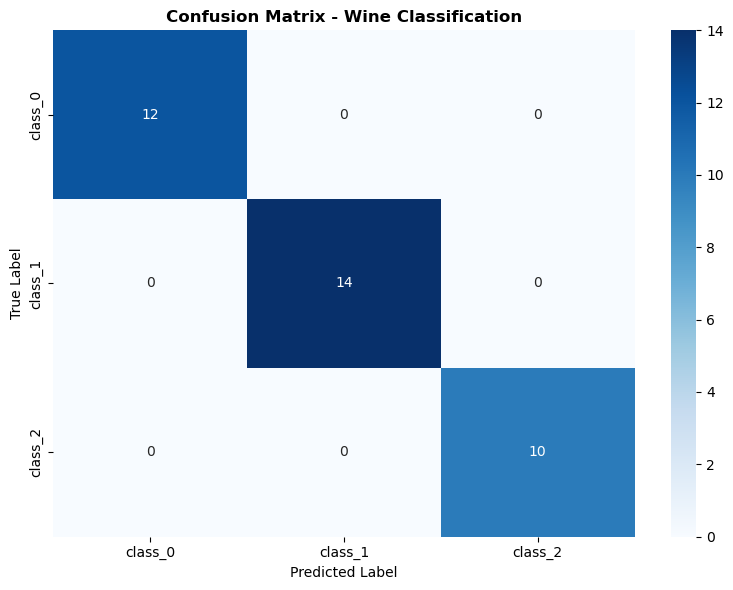

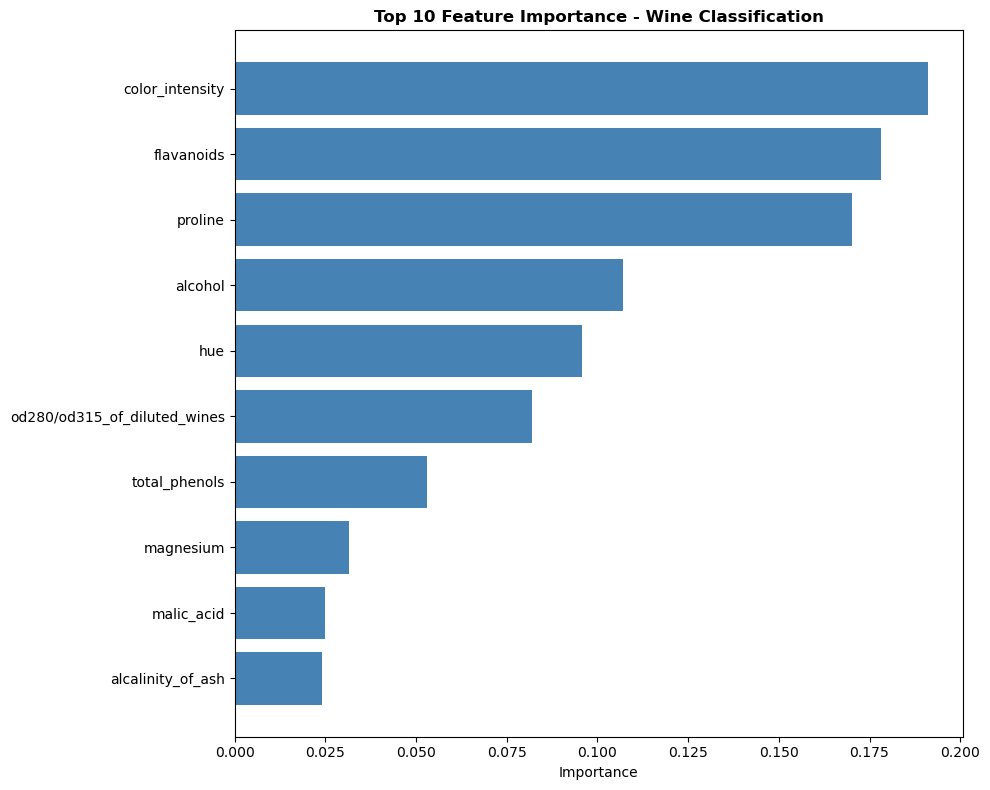

2025/11/08 16:32:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



💾 Сохранение модели в MLflow...
Модель и артефакты сохранены

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ
Run ID: 4a7a219288b34a42999cbf1858abc3e6

📈 МЕТРИКИ:
  Train Accuracy:    1.0000
  Test Accuracy:     1.0000
  Precision:         1.0000
  Recall:            1.0000
  F1 Score:          1.0000
  ROC AUC:           1.0000
  CV Score:          0.9791 (+/- 0.0277)

Top 3 признака по важности:
  color_intensity           0.1911
  flavanoids                0.1781
  proline                   0.1702


✓ Все данные залогированы в MLflow
Просмотр: https://mlflow.labs.itmo.loc/#/experiments/4/runs/4a7a219288b34a42999cbf1858abc3e6
🏃 View run wine-rf-20251108-163214 at: https://mlflow.labs.itmo.loc/#/experiments/4/runs/4a7a219288b34a42999cbf1858abc3e6
🧪 View experiment at: https://mlflow.labs.itmo.loc/#/experiments/4


In [6]:
print("\n" + "="*70)
print("ОБУЧЕНИЕ МОДЕЛИ С MLFLOW")
print("="*70)

params = {
    "n_estimators": 200,
    "max_depth": 8,
    "min_samples_split": 4,
    "min_samples_leaf": 2,
    "max_features": "sqrt",
    "random_state": 42,
    "n_jobs": -1
}

with mlflow.start_run(run_name=f"wine-rf-{datetime.now().strftime('%Y%m%d-%H%M%S')}") as run:
    
    run_id = run.info.run_id
    print(f"\nНачат MLflow Run: {run_id}")
    
    mlflow.log_params(params)
    mlflow.log_param("test_size", 0.2)
    mlflow.log_param("normalization", "StandardScaler")
    mlflow.log_param("random_state", 42)
    
    mlflow.set_tag("model_type", "RandomForestClassifier")
    mlflow.set_tag("dataset", "wine")
    mlflow.set_tag("task", "multiclass_classification")
    mlflow.set_tag("developer", "student")
    mlflow.set_tag("lab_work", "jupyterhub-mlflow-integration")
    
    print("\nОбучение Random Forest модели...")
    model = RandomForestClassifier(**params)
    model.fit(X_train_scaled, y_train)
    print("✓ Модель обучена")
    
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    
    print("\nВычисление метрик...")
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    
    test_roc_auc = roc_auc_score(y_test, y_pred_proba, 
                                   multi_class='ovr', average='weighted')
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)
    mlflow.log_metric("test_precision", test_precision)
    mlflow.log_metric("test_recall", test_recall)
    mlflow.log_metric("test_f1_score", test_f1)
    mlflow.log_metric("test_roc_auc", test_roc_auc)
    mlflow.log_metric("cv_score_mean", cv_mean)
    mlflow.log_metric("cv_score_std", cv_std)
    
    cm = confusion_matrix(y_test, y_pred_test)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names,
                yticklabels=target_names)
    plt.title('Confusion Matrix - Wine Classification', fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
    mlflow.log_artifact('confusion_matrix.png')
    plt.show()
    
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance['feature'][:10], 
             feature_importance['importance'][:10],
             color='steelblue')
    plt.xlabel('Importance')
    plt.title('Top 10 Feature Importance - Wine Classification', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=150, bbox_inches='tight')
    mlflow.log_artifact('feature_importance.png')
    plt.show()
    
    # Сохранение feature importance как CSV
    feature_importance.to_csv('feature_importance.csv', index=False)
    mlflow.log_artifact('feature_importance.csv')
    
    report = classification_report(y_test, y_pred_test, 
                                   target_names=target_names,
                                   digits=4)
    
    with open("classification_report.txt", "w") as f:
        f.write("="*70 + "\n")
        f.write("WINE CLASSIFICATION - ДЕТАЛЬНЫЙ ОТЧЕТ\n")
        f.write("="*70 + "\n\n")
        f.write(f"Модель: Random Forest Classifier\n")
        f.write(f"Дата: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"Run ID: {run_id}\n\n")
        f.write("-"*70 + "\n")
        f.write("МЕТРИКИ ПРОИЗВОДИТЕЛЬНОСТИ\n")
        f.write("-"*70 + "\n")
        f.write(f"Train Accuracy: {train_accuracy:.4f}\n")
        f.write(f"Test Accuracy:  {test_accuracy:.4f}\n")
        f.write(f"Precision:      {test_precision:.4f}\n")
        f.write(f"Recall:         {test_recall:.4f}\n")
        f.write(f"F1 Score:       {test_f1:.4f}\n")
        f.write(f"ROC AUC:        {test_roc_auc:.4f}\n")
        f.write(f"CV Score:       {cv_mean:.4f} (+/- {cv_std:.4f})\n\n")
        f.write("-"*70 + "\n")
        f.write("CLASSIFICATION REPORT\n")
        f.write("-"*70 + "\n")
        f.write(report)
        f.write("\n" + "-"*70 + "\n")
        f.write("CONFUSION MATRIX\n")
        f.write("-"*70 + "\n")
        f.write(str(cm))
    
    mlflow.log_artifact("classification_report.txt")
    
    print("\n💾 Сохранение модели в MLflow...")
    
    signature = mlflow.models.infer_signature(X_train_scaled, model.predict(X_train_scaled))
    
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        signature=signature,
        input_example=X_train_scaled[:5],
        registered_model_name=None,
        pip_requirements=[
            "scikit-learn",
            "pandas",
            "numpy"
        ]
    )
    
    import joblib
    joblib.dump(scaler, "scaler.pkl")
    mlflow.log_artifact("scaler.pkl")
    
    print("Модель и артефакты сохранены")
    
    print("\n" + "="*70)
    print("РЕЗУЛЬТАТЫ ОБУЧЕНИЯ")
    print("="*70)
    print(f"Run ID: {run_id}")
    print(f"\n📈 МЕТРИКИ:")
    print(f"  Train Accuracy:    {train_accuracy:.4f}")
    print(f"  Test Accuracy:     {test_accuracy:.4f}")
    print(f"  Precision:         {test_precision:.4f}")
    print(f"  Recall:            {test_recall:.4f}")
    print(f"  F1 Score:          {test_f1:.4f}")
    print(f"  ROC AUC:           {test_roc_auc:.4f}")
    print(f"  CV Score:          {cv_mean:.4f} (+/- {cv_std:.4f})")
    print(f"\nTop 3 признака по важности:")
    for i, row in feature_importance.head(3).iterrows():
        print(f"  {row['feature']:25} {row['importance']:.4f}")
    print("\n" + "="*70)
    print(f"\n✓ Все данные залогированы в MLflow")
    print(f"Просмотр: https://mlflow.labs.itmo.loc/#/experiments/{experiment_id}/runs/{run_id}")


In [8]:
print("\n" + "=" * 70)
print("РЕГИСТРАЦИЯ МОДЕЛИ В MODEL REGISTRY")
print("=" * 70)

model_name = "wine-classifier-rf"
model_uri = f"runs:/{run_id}/model"

try:
    # Регистрация модели
    print(f"\n📝 Регистрация модели '{model_name}'...")
    model_version = mlflow.register_model(
        model_uri=model_uri,
        name=model_name
    )

    print(f"Модель зарегистрирована успешно!")
    print(f"Название: {model_name}")
    print(f"Версия: {model_version.version}")

    # Работа с Model Registry через MlflowClient
    client = MlflowClient()

    # Добавление описания к версии модели
    description = f"""
Wine Classification Model - Random Forest

Метрики производительности:
- Test Accuracy: {test_accuracy:.4f}
- F1 Score: {test_f1:.4f}
- ROC AUC: {test_roc_auc:.4f}
- CV Score: {cv_mean:.4f} (+/- {cv_std:.4f})

Датасет: Wine Dataset (sklearn)
Дата обучения: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Задача: Классификация сортов вина (3 класса)

Модель обучена на {X_train.shape[0]} образцах с {X_train.shape[1]} признаками.
"""

    client.update_model_version(
        name=model_name,
        version=model_version.version,
        description=description
    )
    print(f"✓ Описание модели добавлено")

    client.transition_model_version_stage(
        name=model_name,
        version=model_version.version,
        stage="Staging",
        archive_existing_versions=False
    )
    print(f"Модель переведена в стадию: Staging")

    client.set_model_version_tag(
        name=model_name,
        version=model_version.version,
        key="validation_status",
        value="passed"
    )

    print(f"\nРЕГИСТРАЦИЯ ЗАВЕРШЕНА!")
    print(f"Model Registry: https://mlflow.labs.itmo.loc/#/models/{model_name}")

except Exception as e:
    print(f"Ошибка при регистрации модели: {e}")


РЕГИСТРАЦИЯ МОДЕЛИ В MODEL REGISTRY

📝 Регистрация модели 'wine-classifier-rf'...


Successfully registered model 'wine-classifier-rf'.
2025/11/08 16:35:08 WARNING mlflow.tracking._model_registry.fluent: Run with id 4a7a219288b34a42999cbf1858abc3e6 has no artifacts at artifact path 'model', registering model based on models:/m-c7352d4d00ff45ecb5e5a4c71c6c678c instead
2025/11/08 16:35:08 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: wine-classifier-rf, version 1
Created version '1' of model 'wine-classifier-rf'.


Модель зарегистрирована успешно!
Название: wine-classifier-rf
Версия: 1
✓ Описание модели добавлено


/tmp/ipykernel_76/2753730744.py:47: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


Модель переведена в стадию: Staging

РЕГИСТРАЦИЯ ЗАВЕРШЕНА!
Model Registry: https://mlflow.labs.itmo.loc/#/models/wine-classifier-rf
